In [1]:
from explorerl.utils import *
from explorerl.QLearning import *

In [2]:
import numpy as np
import torch
import tensorflow as tf
import gym
import sys

# Linear QLearning on MountainCar 

In [3]:
env = gym.make("MountainCar-v0")
e = EnvRunner(env)

## With Featurizing

In [4]:
scaler, featurizer = create_scaler_featurizer(env,make_scaler=True)

### Tensorflow

In [ ]:
qtf = QLearningTf(learning_rate=0.001,featurizer=featurizer,scaler=scaler)

In [ ]:
stat = e.train(qtf,episodes=200,plot=True)
e.test(qtf,gif=True)

In [17]:
a = np.zeros((32,32,3))

In [45]:
a = np.zeros((32,32,3))
np.lib.pad(a, pad_width=((0,0),(0,0)), mode='constant', constant_values=1).shape

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (2,2) and requested shape (3,2)

In [66]:
a = np.ones((32,32,3))

# npad is a tuple of (n_before, n_after) for each dimension
npad = ((1, 1), (1, 1),(0,0))
b = np.pad(a, pad_width=npad, mode='constant', constant_values=0)

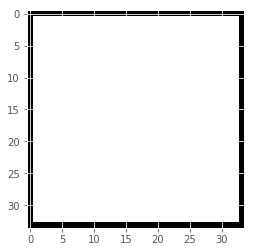

In [75]:
plt.imshow(b)

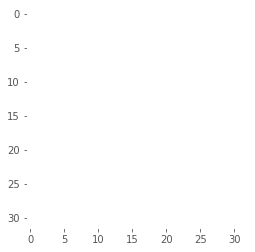

In [10]:
plt.imshow(a)

### PyTorch

In [5]:
qtorch = QLearningTorch(learning_rate=0.001,featurizer=featurizer,scaler=scaler)

  0%|          | 0/100 [00:00<?, ?it/s]

Model Created!


Epsilon : 3.7074446659261245e-44, Num Steps : 145, Avg Reward with Window Size 100 : -158.75: 100%|██████████| 100/100 [00:55<00:00,  1.79it/s]           
/Users/shyam/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/shyam/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


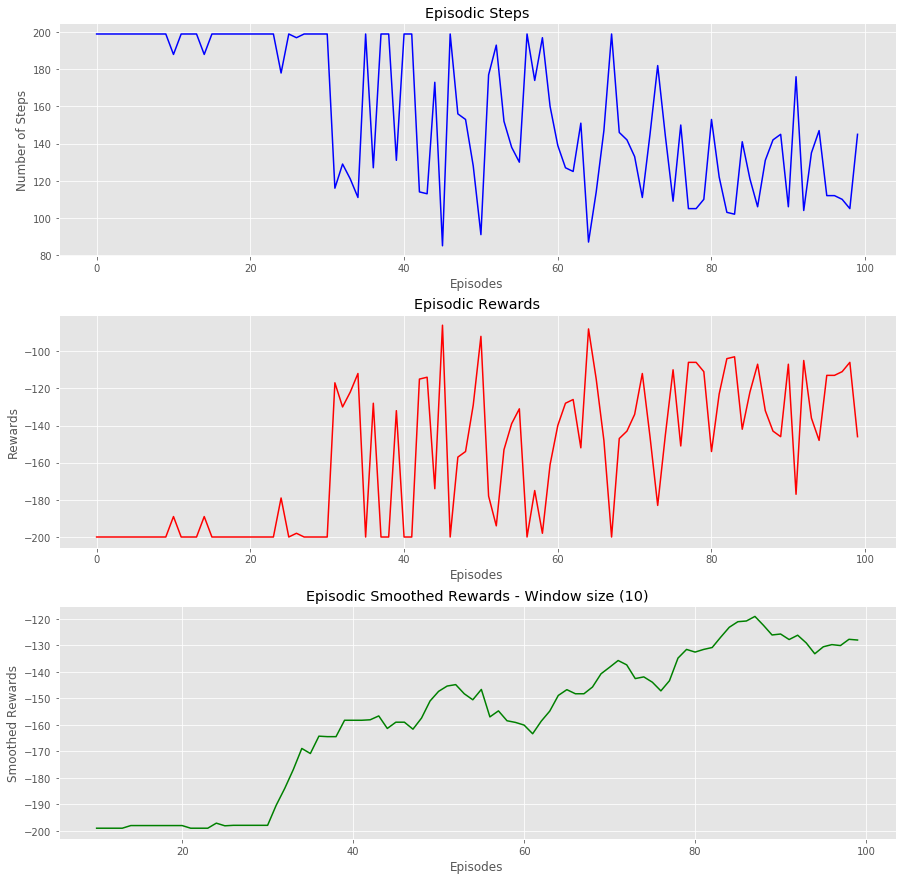


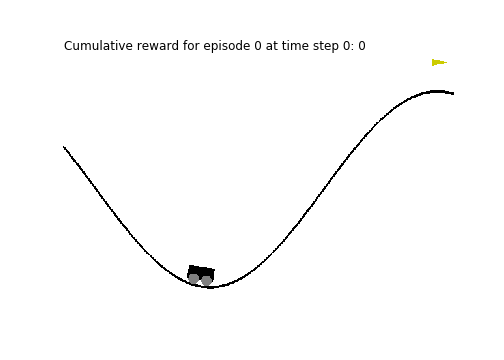
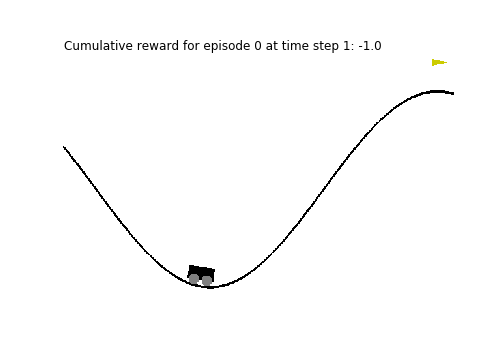
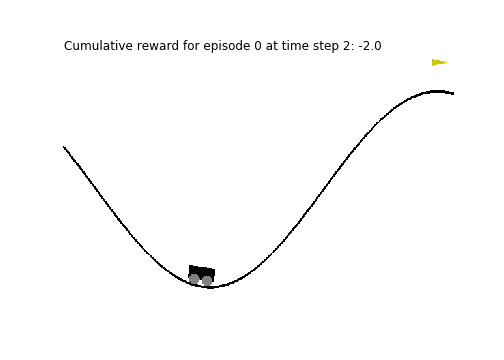
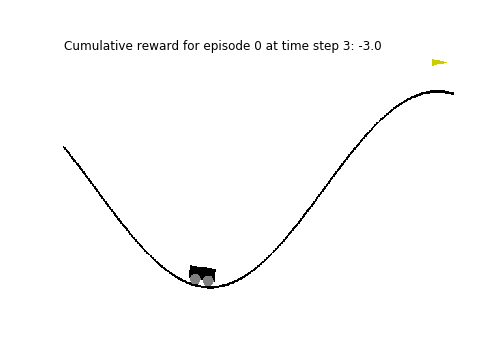
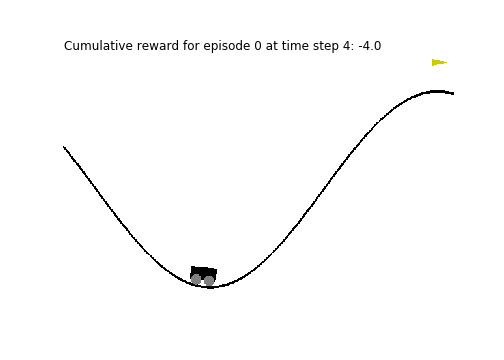
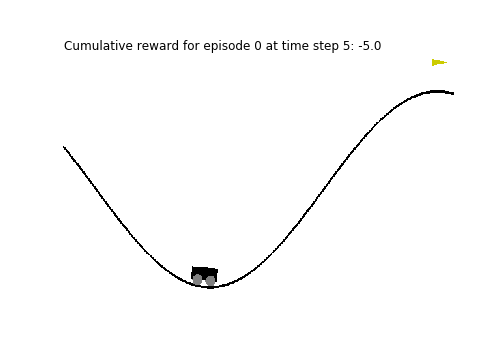
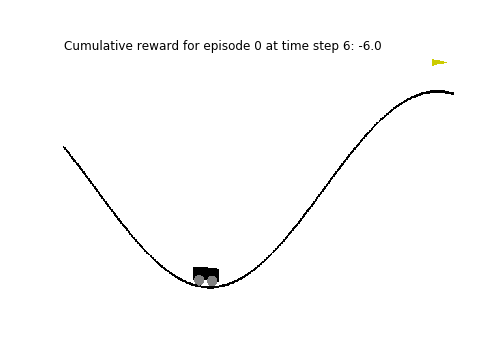
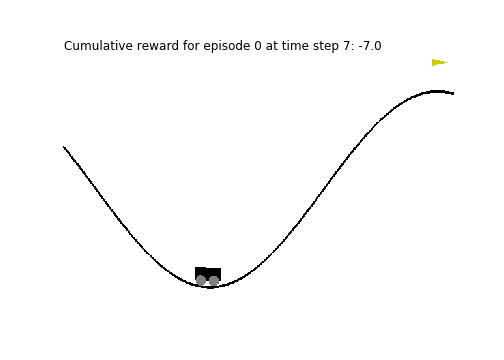
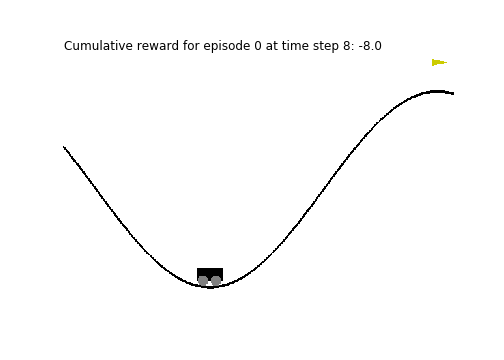
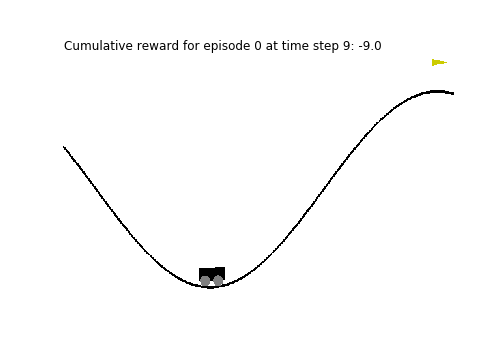
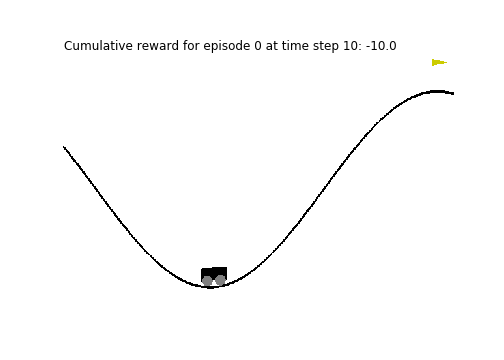
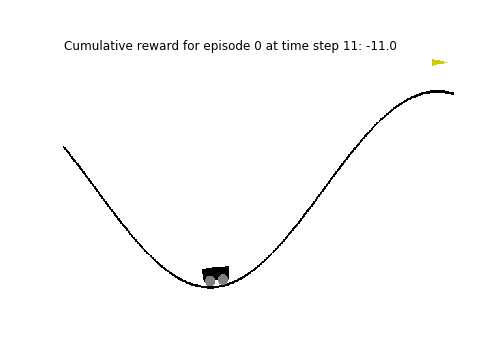
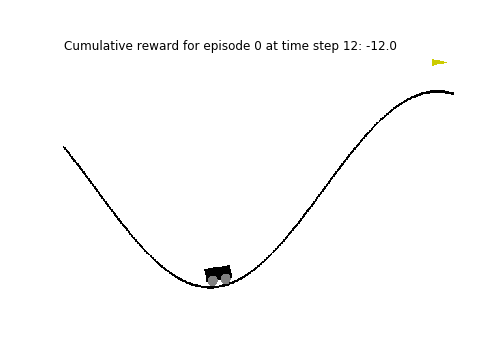
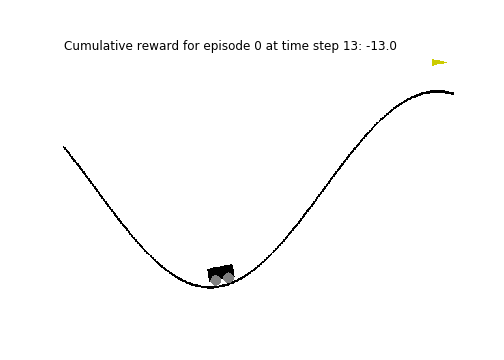
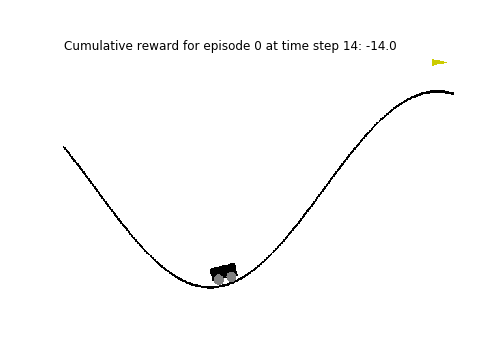
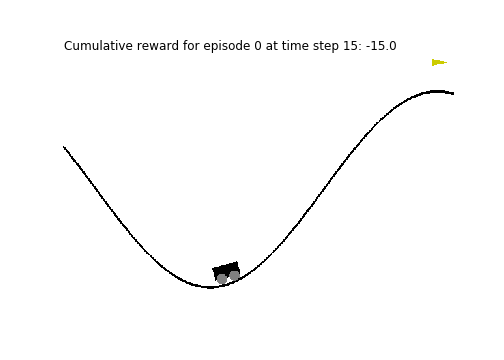
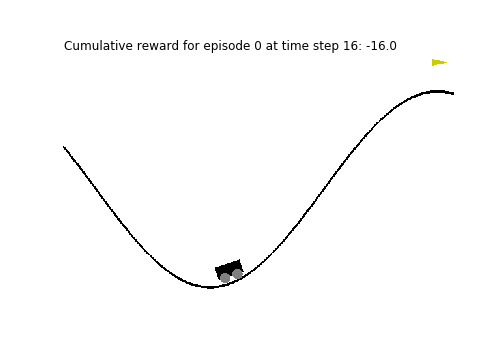
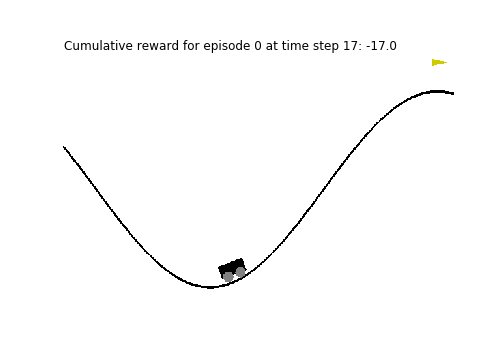
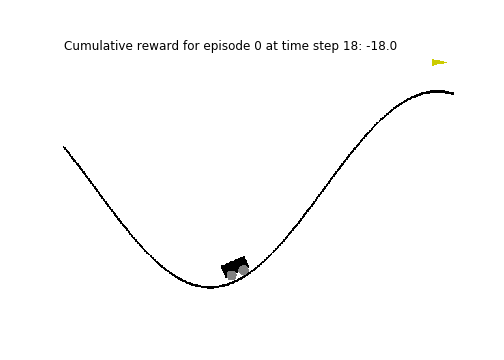
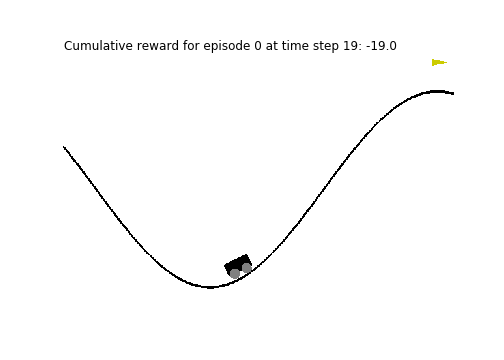
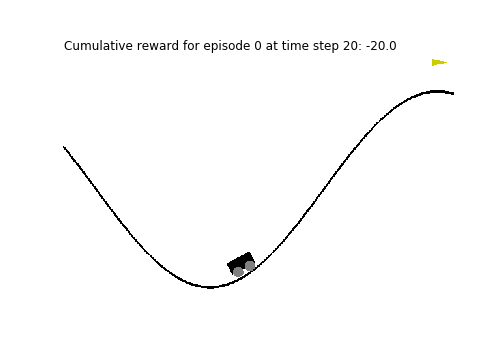
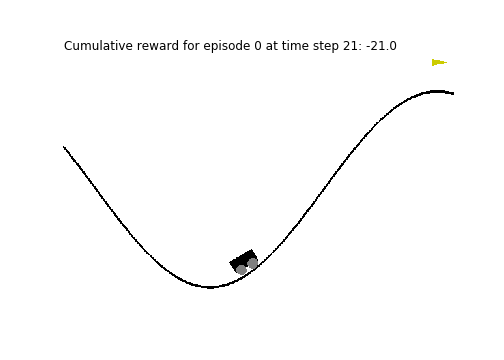
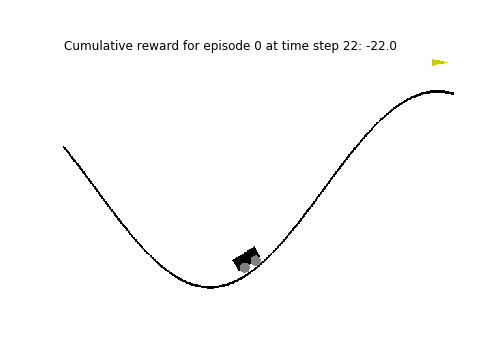
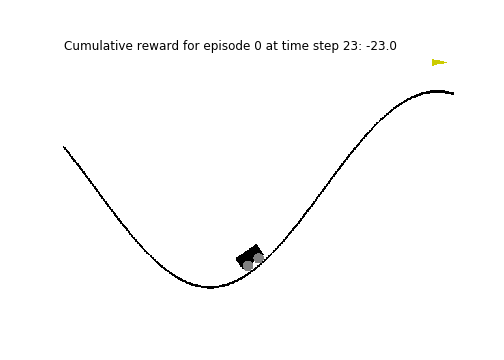
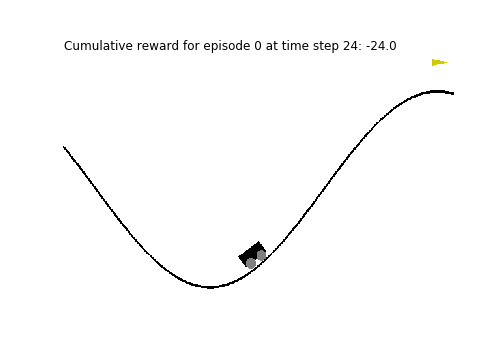
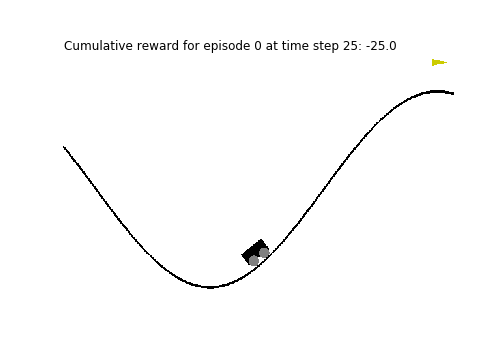
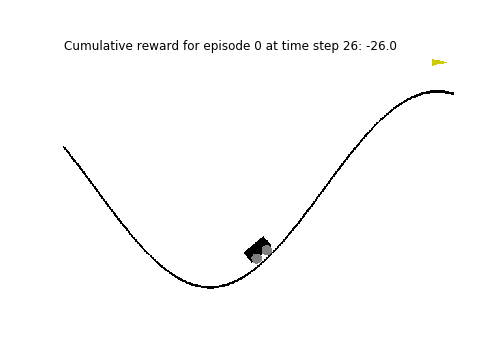
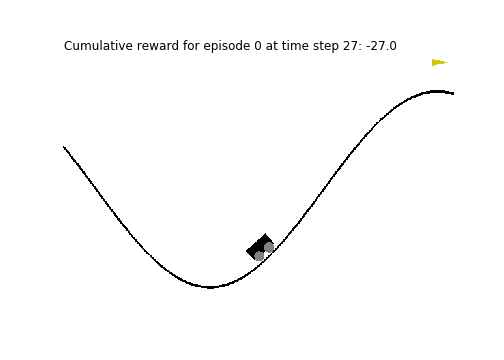
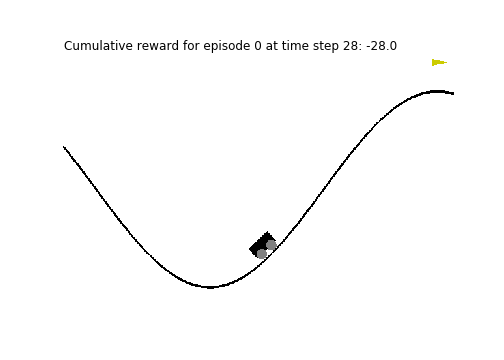
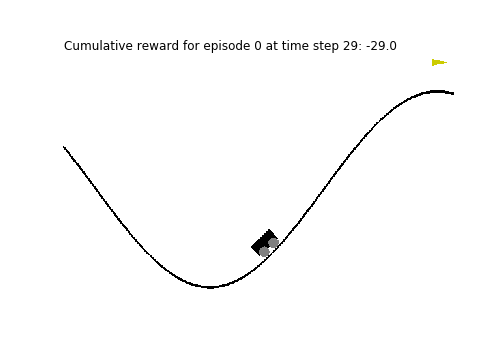
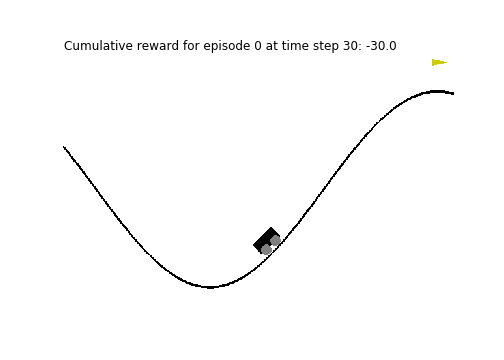
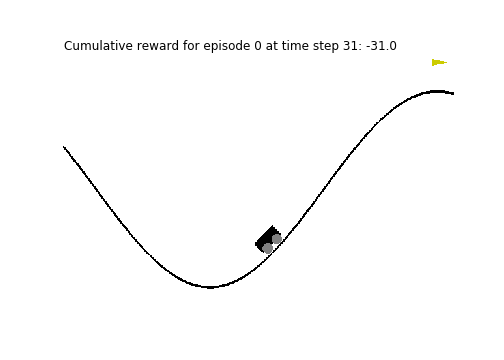
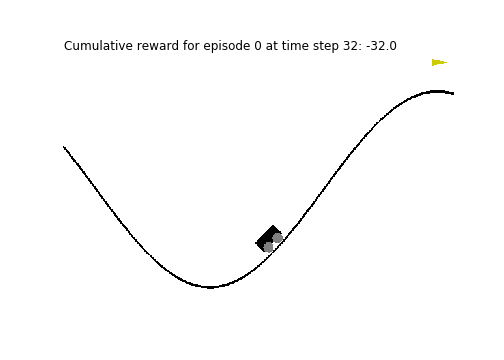
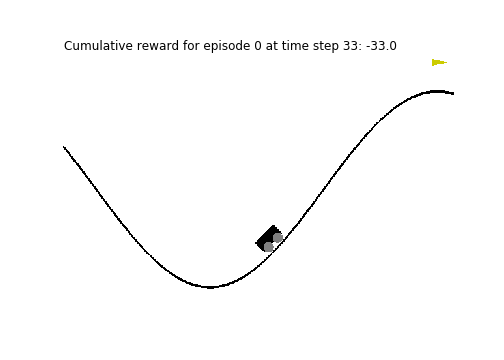
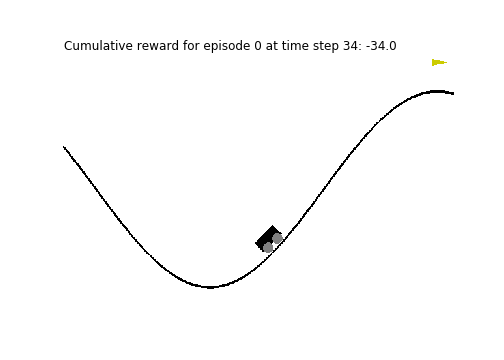
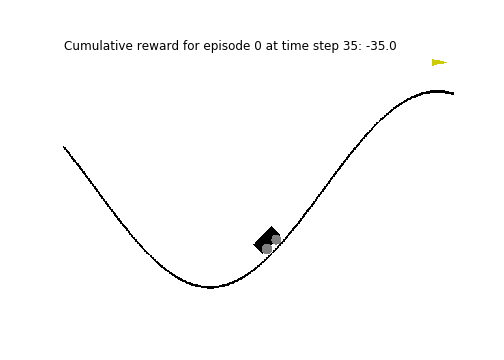
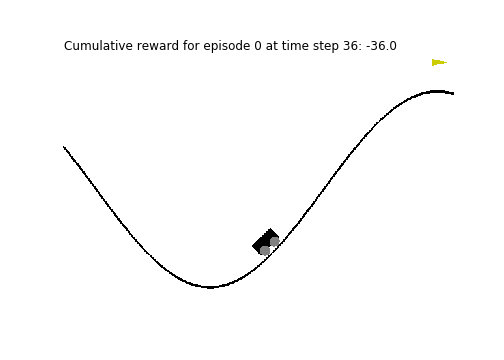
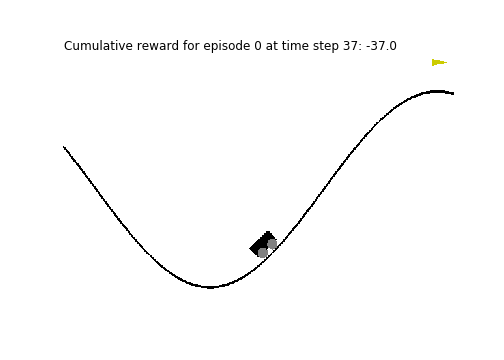
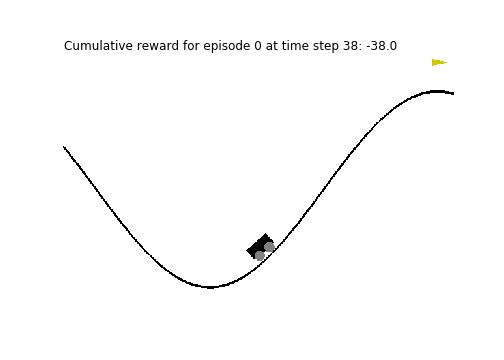
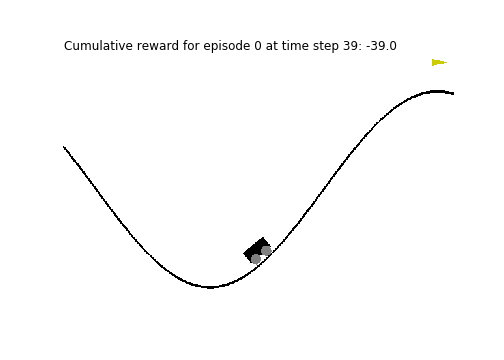
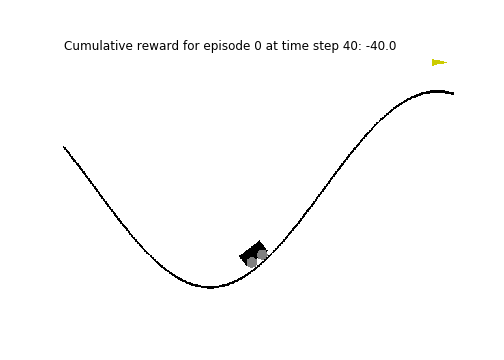
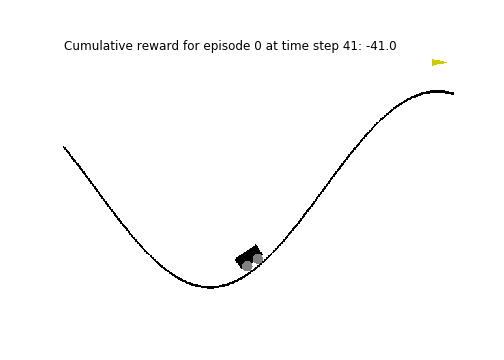
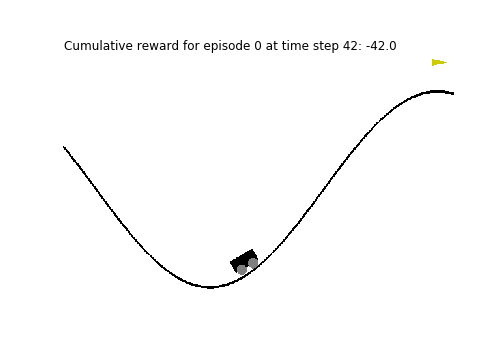
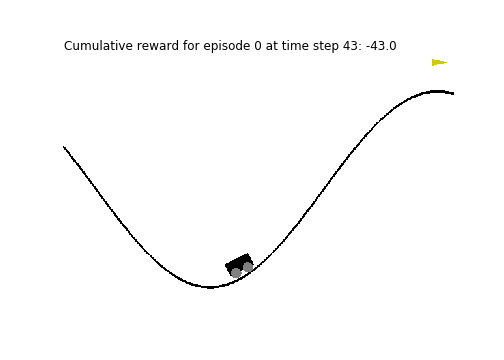
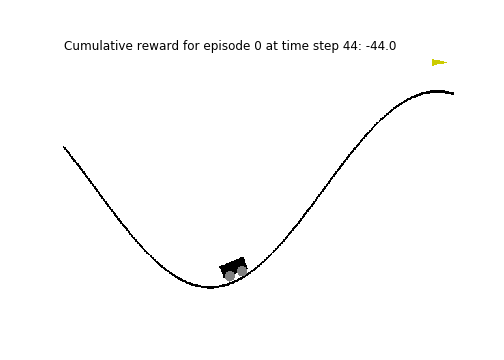
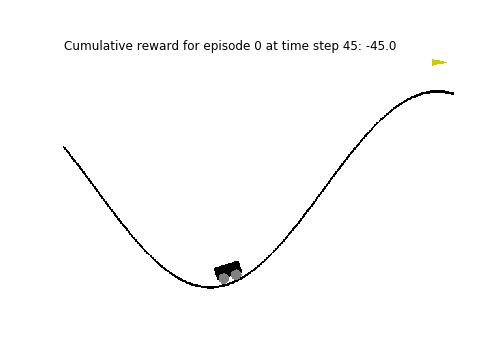
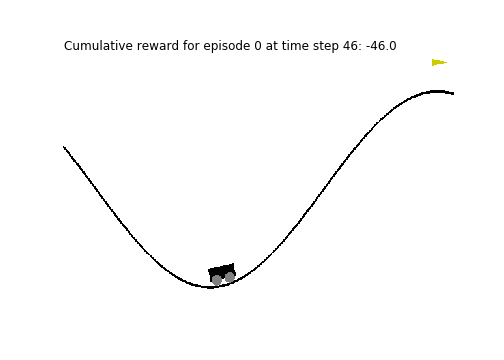
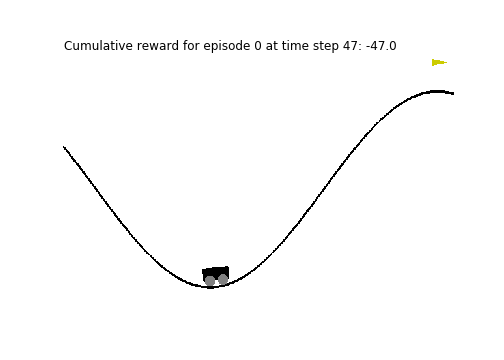
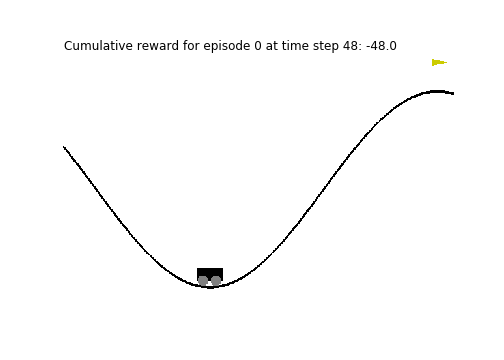
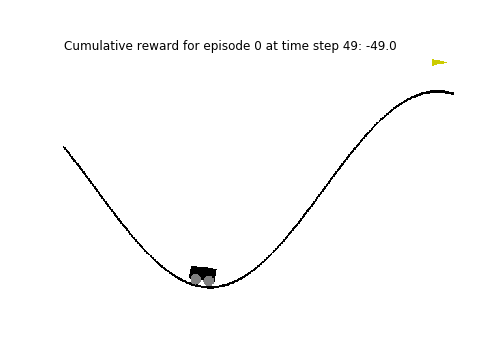
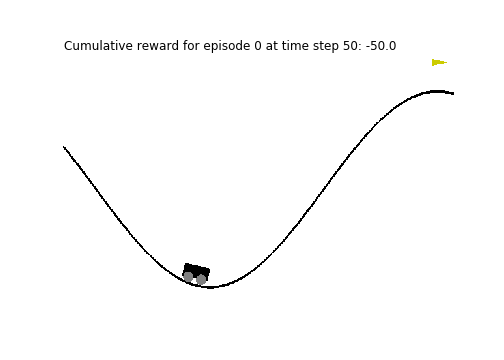
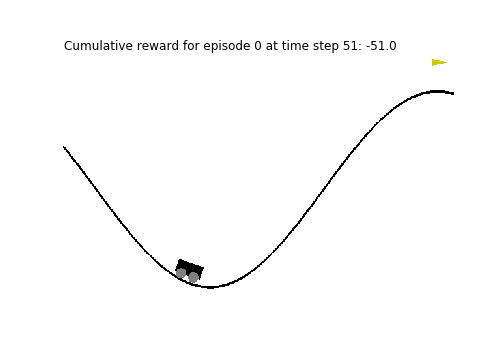
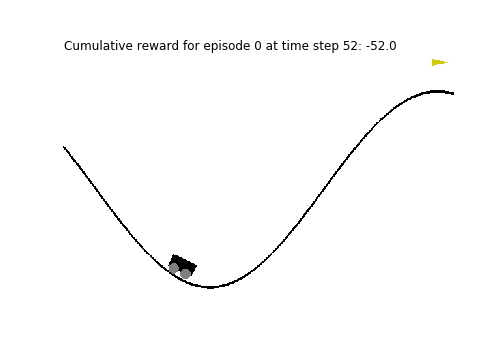
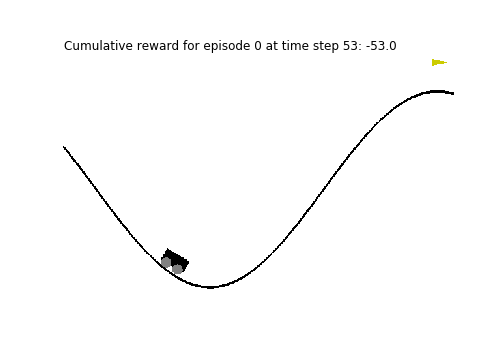
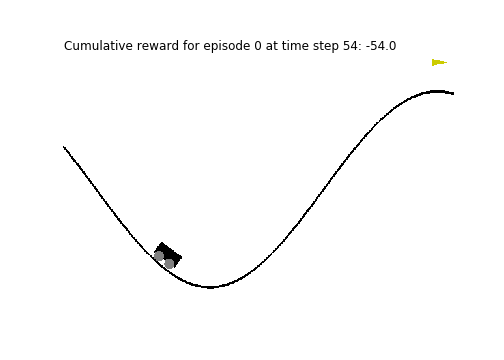
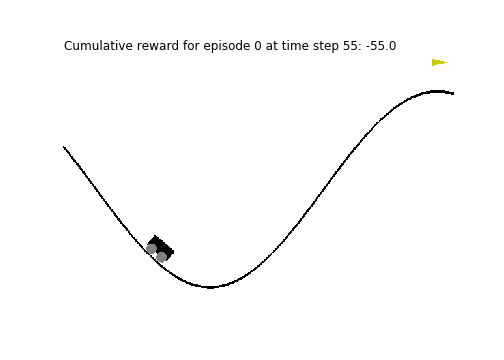
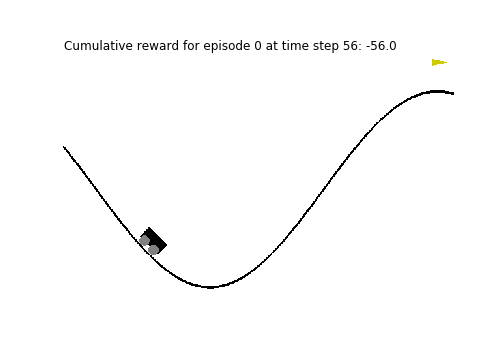
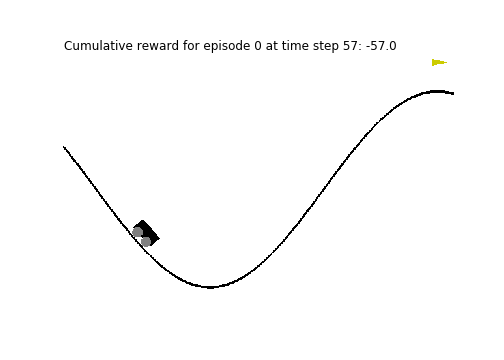
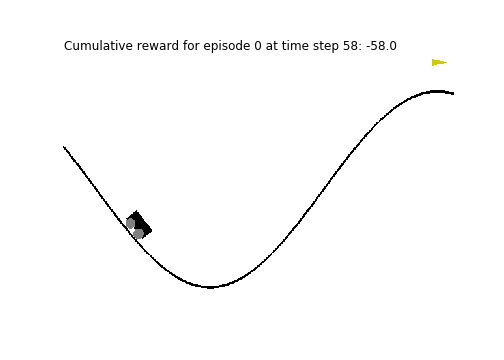
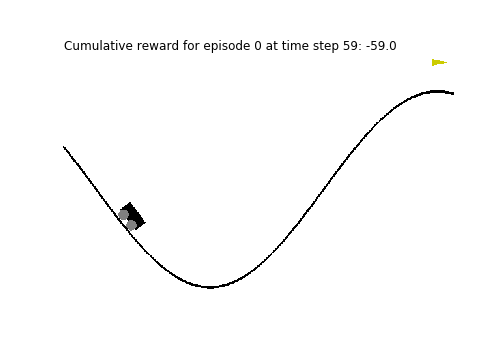
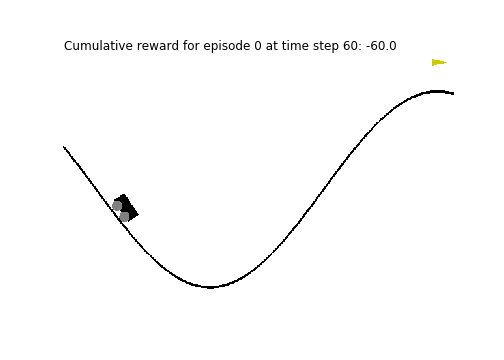
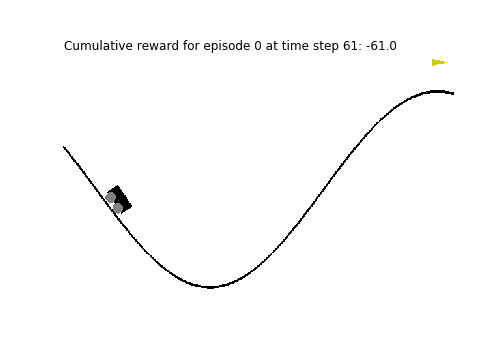
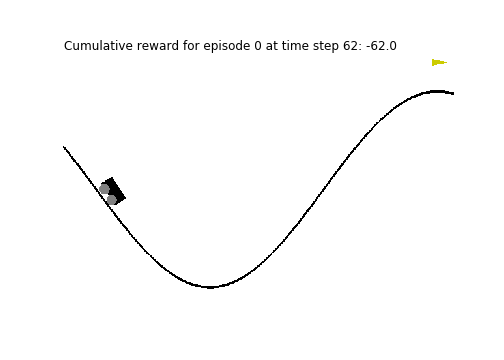
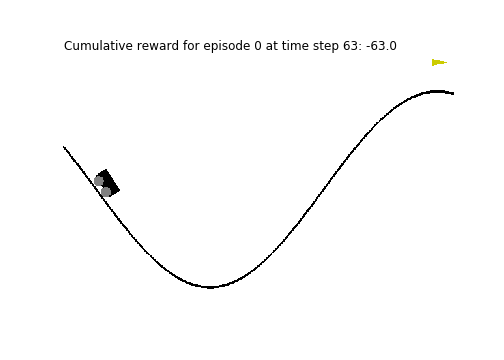
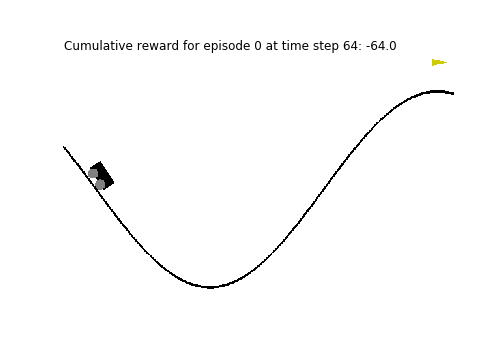
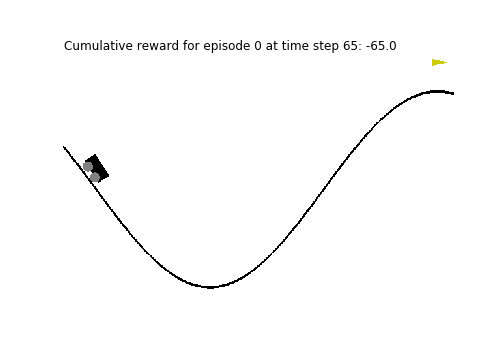
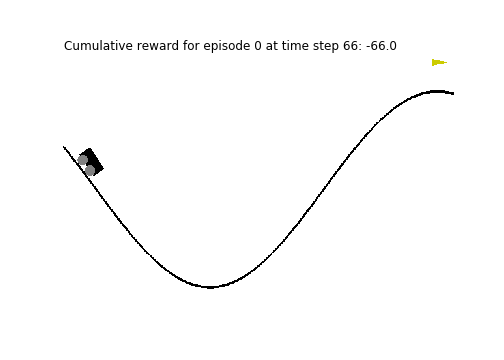
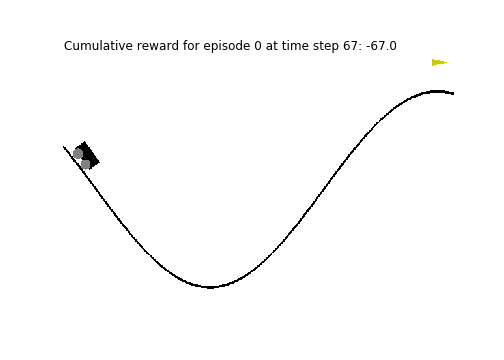
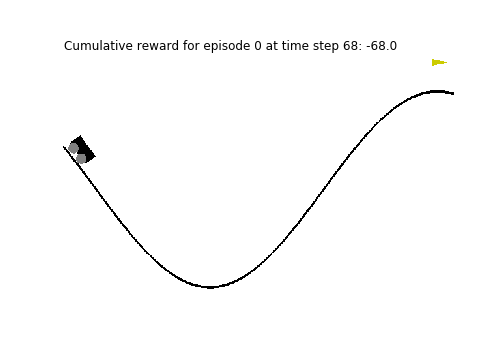
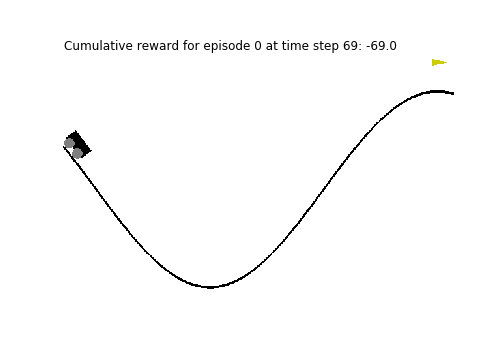
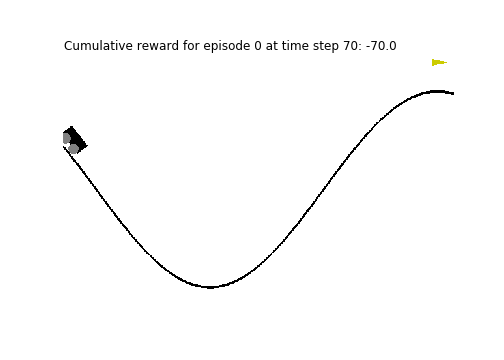
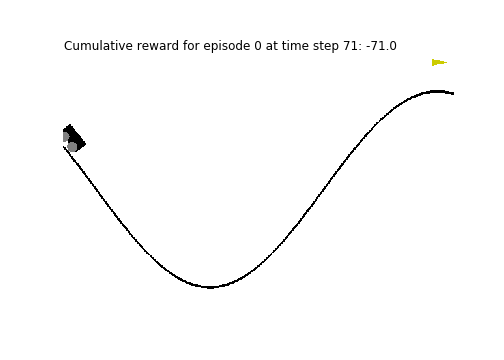
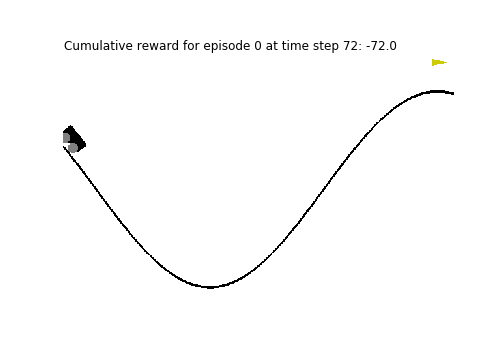
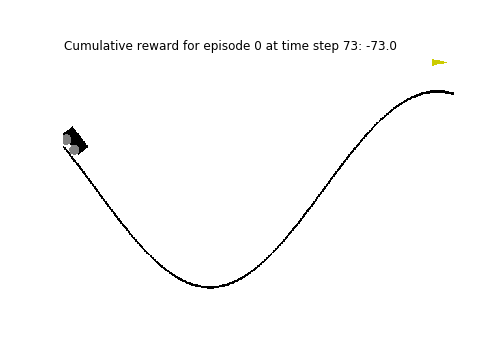
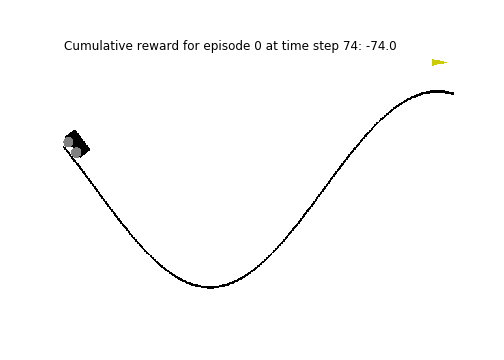
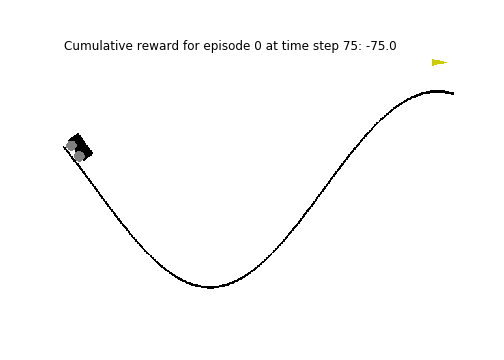
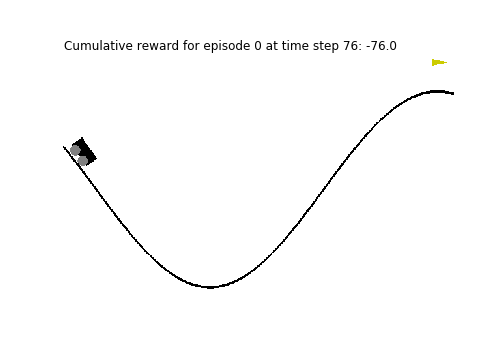
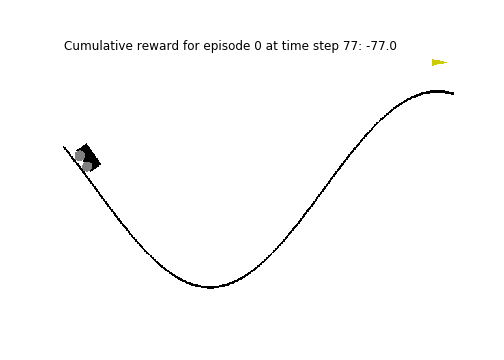
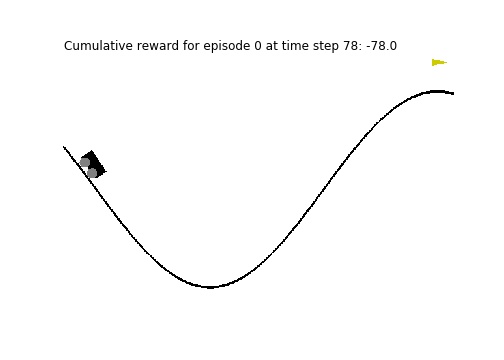
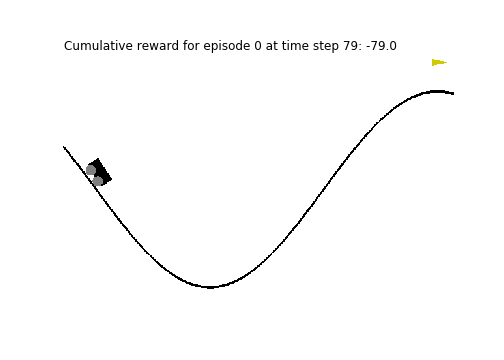
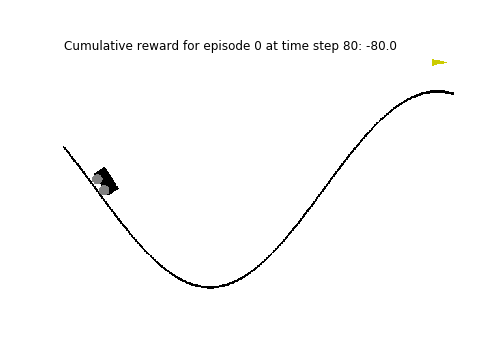
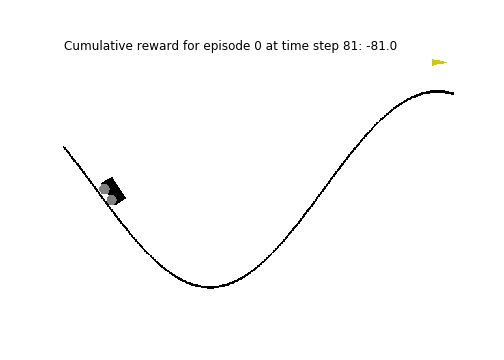
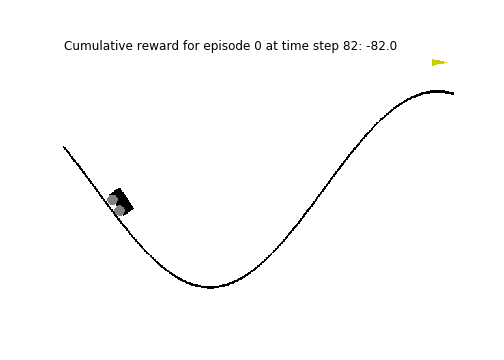
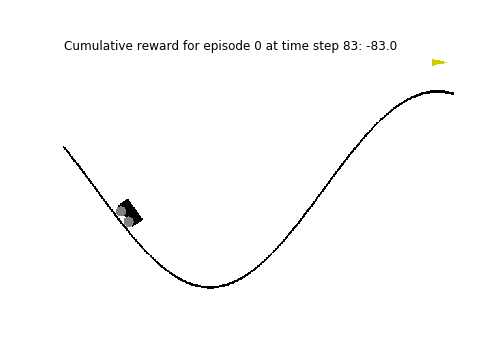
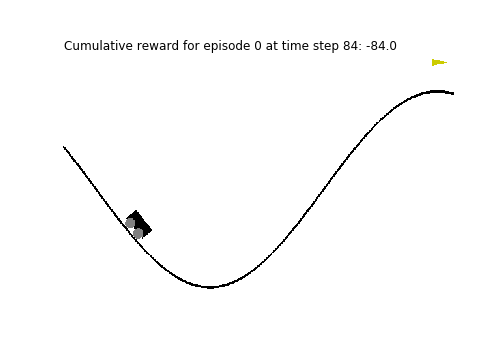
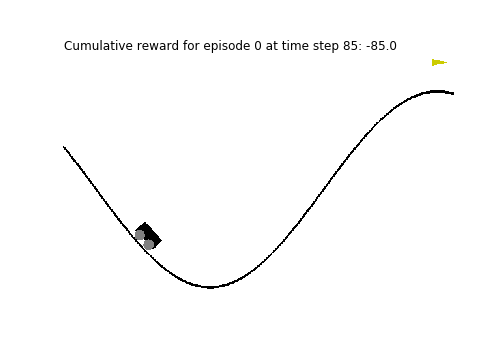
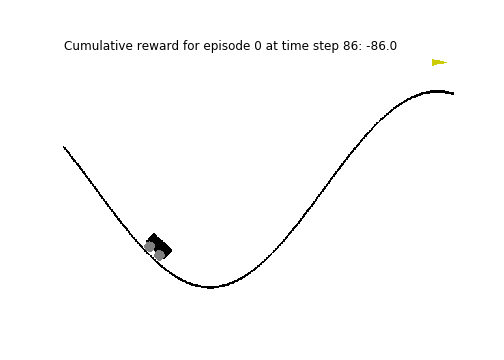
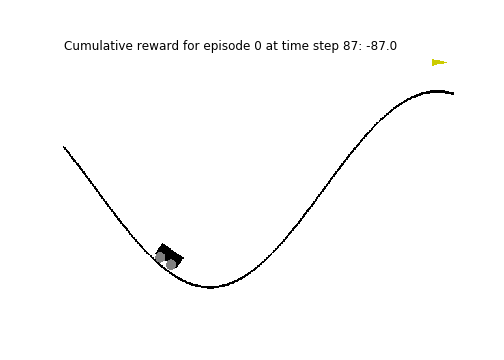
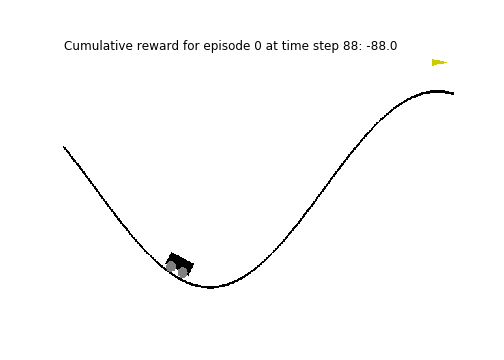
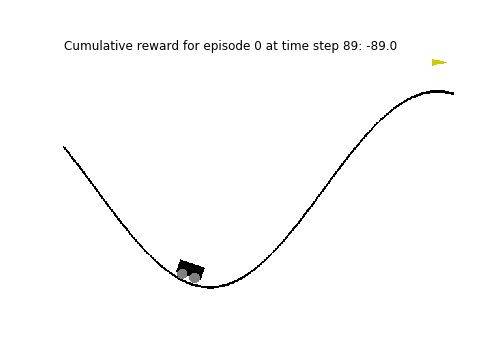
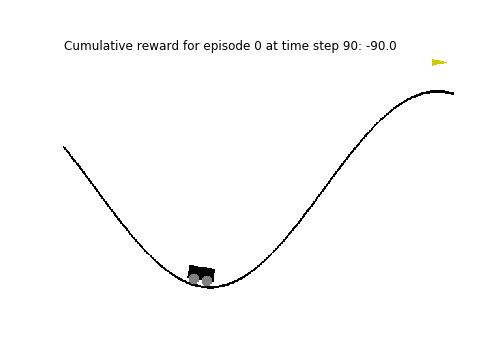
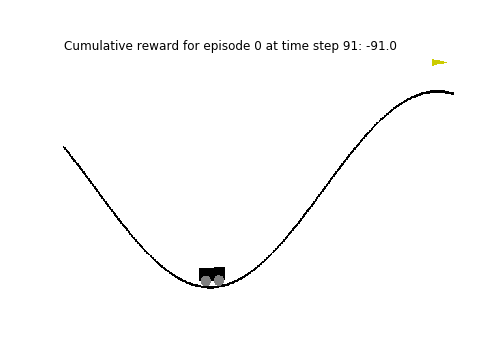
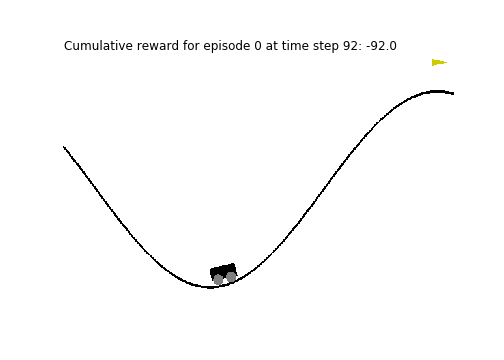
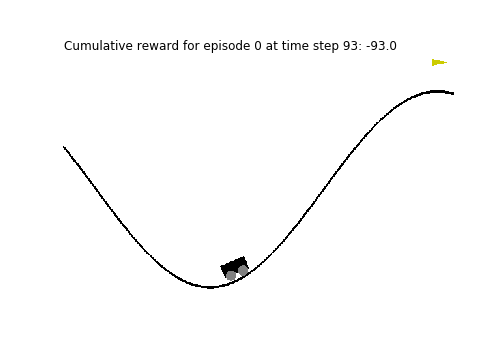
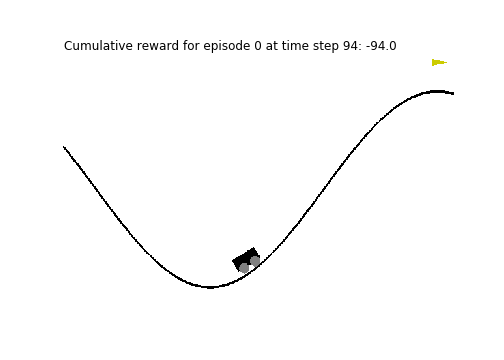
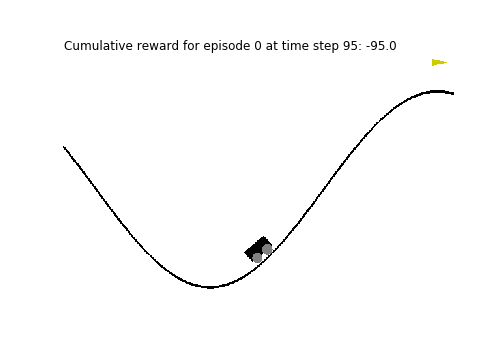
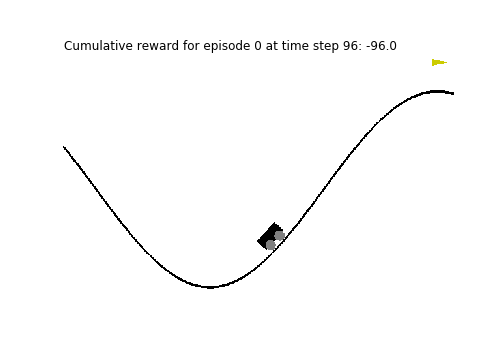
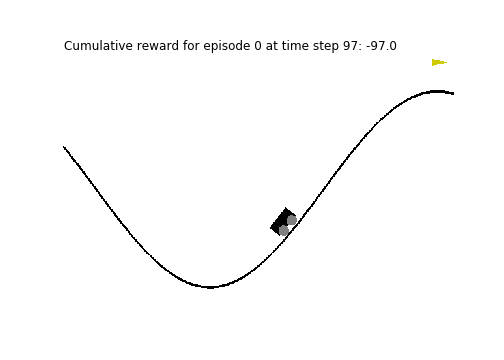
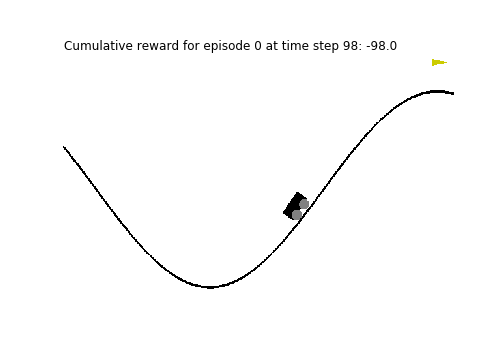
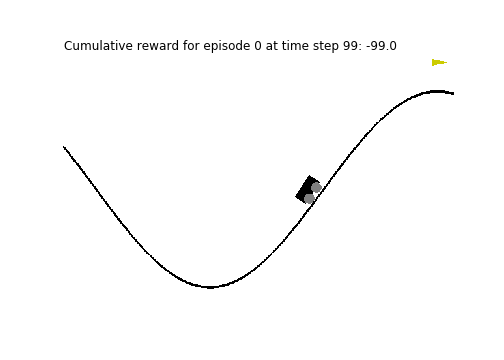
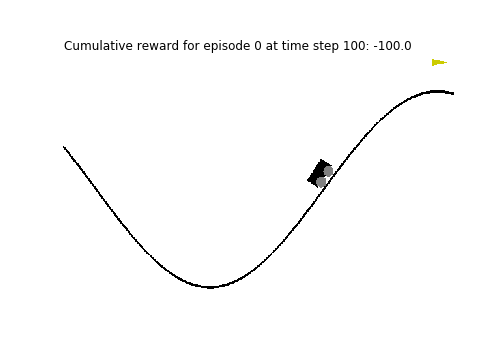
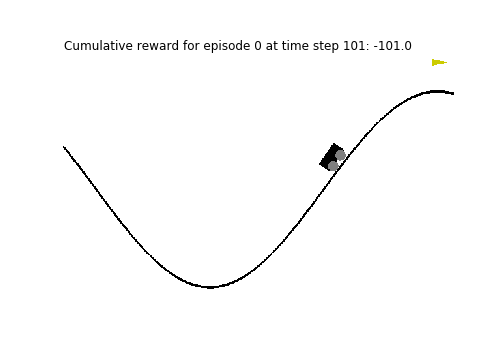
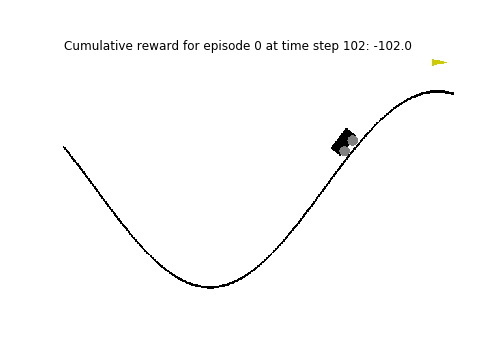
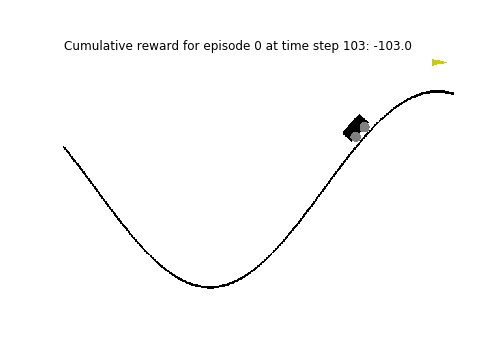
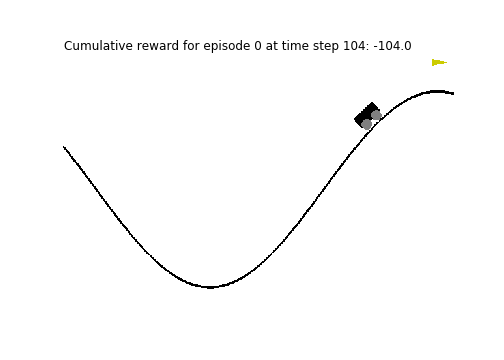
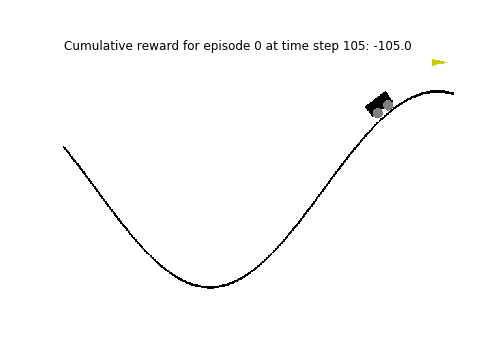
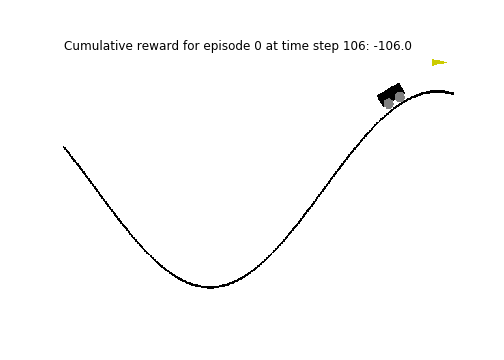
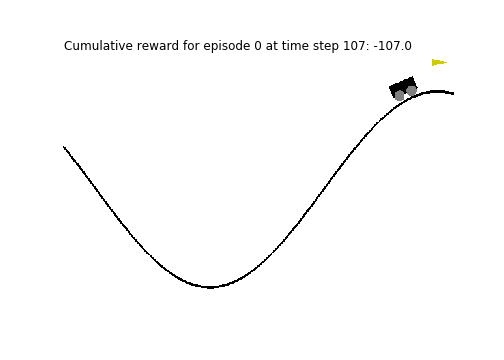
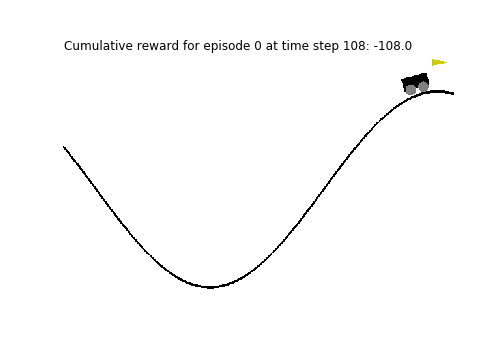
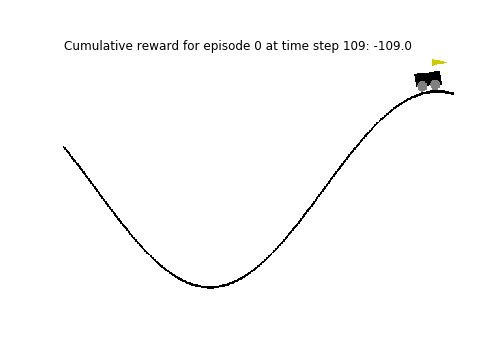

In [6]:
stat = e.train(episodes=100,agent=qtorch,plot=True)
e.test(qtorch,display=False,gif=True)

## Without Featurizing

### Tensorflow

In [ ]:
qtf = QLearningTf(featurizer=None,scaler=None)

In [ ]:
stat = e.train(qtf,plot=True)
e.test(qtf,gif=True)

### PyTorch

In [ ]:
qtorch = QLearningTorch(learning_rate=0.01,featurizer=None,scaler=None)

In [ ]:
stat = e.train(qtorch,plot=True)
e.test(qtorch,gif=True)